<a href="https://colab.research.google.com/github/eDoggo3779/Water_Insecurity/blob/main/Water_Insecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To what extent are plumbing and water insecurity outcomes across U.S. counties associated with education levels and racial/ethnic composition?

https://www.mdpi.com/1660-4601/9/4/1201?

In [88]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
water_df = pd.read_csv("/content/drive/MyDrive/DSRP/water_insecurity_2022.csv")
water_df.dropna(inplace=True)

water_df[['county', 'state']] = water_df['name'].str.split(',', n=1, expand=True)
water_df['county'] = water_df['county'].str.strip()
water_df['state'] = water_df['state'].str.strip()

water_df['plp_scaled'] = water_df['percent_lacking_plumbing'].apply(lambda x: np.log10(x) if x > 0 else 0)
water_df['plp_scaled'] += abs(water_df['plp_scaled'].min())

water_df = water_df[['geoid', 'year', 'name', 'geometry', 'state', 'county', 'total_pop', 'plumbing', 'percent_lacking_plumbing', "plp_scaled"]]

In [90]:
edu_race_df = pd.read_csv("/content/drive/MyDrive/DSRP/Water_Insecurity_Dataset.csv.csv")
edu_race_df.dropna(inplace=True)

In [91]:
df22_nums = pd.merge(water_df, edu_race_df, on=['geoid', 'year', 'name', 'state', 'county'])
df22_nums.rename(columns={"hl_college_associate'": 'hl_college_associate'}, inplace=True)

In [93]:
df22_pcts = df22_nums.copy()

cols_edu = ['total_edu', 'less_than_hs_diploma', 'hs_diploma_equivalent', 'college_associate', 'bachelor_grad_degree']
df22_pcts[cols_edu] = df22_nums[cols_edu].div(df22_nums['total_edu'], axis=0) * 100
cols_nhl_white = ['total_nhl_white', 'nhl_white_less_than_hs_diploma', 'nhl_white_hs_diploma_equivalent', 'nhl_white_college_associate', 'nhl_white_bachelor_grad_degree',]
df22_pcts[cols_nhl_white] = df22_nums[cols_nhl_white].div(df22_nums['total_nhl_white'], axis=0) * 100
cols_hl = ['total_hl', 'hl_less_than_hs_diploma', 'hl_hs_diploma_equivalent', 'hl_college_associate', 'hl_bachelor_grad_degree']
df22_pcts[cols_hl] = df22_nums[cols_hl].div(df22_nums['total_hl'], axis=0) * 100

df22_pcts.drop(columns="plumbing", inplace=True)

In [94]:
df22_pcts.head()

,geoid,year,name,geometry,state,county,total_pop,percent_lacking_plumbing,plp_scaled,total_edu,...,total_nhl_white,nhl_white_less_than_hs_diploma,nhl_white_hs_diploma_equivalent,nhl_white_college_associate,nhl_white_bachelor_grad_degree,total_hl,hl_less_than_hs_diploma,hl_hs_diploma_equivalent,hl_college_associate,hl_bachelor_grad_degree
0,1069,2022,"Houston County, Alabama","list(list(c(975267.980555021, 975512.944547447...",Alabama,Houston County,108079,0.086048,1.211651,100.0,...,100.0,9.584490,29.879217,31.943087,28.593206,100.0,33.257610,21.308496,27.714675,17.719219
1,6037,2022,"Los Angeles County, California","list(list(c(-2066923.36656991, -2066434.254456...",California,Los Angeles County,9721138,0.063727,1.081234,100.0,...,100.0,4.585755,14.908653,24.746098,55.759494,100.0,34.669064,26.259296,23.474635,15.597004
2,6097,2022,"Sonoma County, California","list(list(c(-2336932.55009848, -2336646.078244...",California,Sonoma County,482650,0.030664,0.763539,100.0,...,100.0,2.991939,15.707895,35.296406,46.003760,100.0,32.953558,25.555895,25.369883,16.120663
3,6001,2022,"Alameda County, California","list(list(c(-2268018.46097794, -2267167.564875...",California,Alameda County,1628997,0.049601,0.972401,100.0,...,100.0,2.973083,11.011095,20.726638,65.289184,100.0,28.908433,25.962206,21.257941,23.871421
4,6045,2022,"Mendocino County, California","list(list(c(-2337141.96995224, -2330029.702977...",California,Mendocino County,89783,0.020048,0.578988,100.0,...,100.0,5.733711,22.755459,43.661691,27.849139,100.0,35.182600,22.110368,32.948784,9.758248


Text(0, 0.5, 'Inadequate plumbing value')

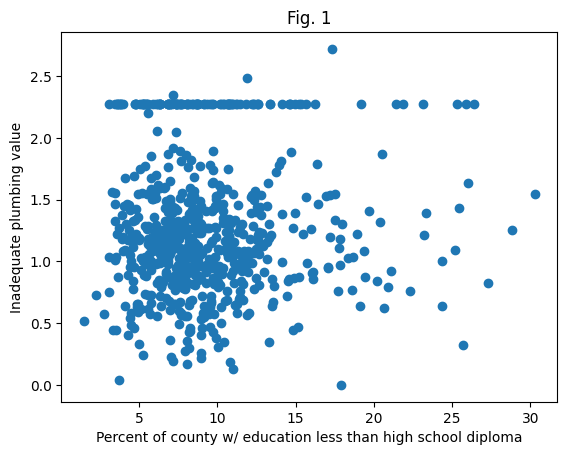

In [95]:
x = df22_pcts['less_than_hs_diploma']
y = df22_pcts['plp_scaled']

plt.scatter(x, y)
plt.title("Fig. 1")
plt.xlabel("Percent of county w/ education less than high school diploma")
plt.ylabel("Inadequate plumbing value")